In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output as cls

In [2]:
data = '/content/drive/MyDrive/fire_dataset'

In [3]:
train_data = tf.keras.utils.image_dataset_from_directory(data, validation_split=0.2, subset="training", seed=123, image_size=(196, 196), batch_size=32)

Found 999 files belonging to 2 classes.
Using 800 files for training.


In [4]:
val_data = tf.keras.utils.image_dataset_from_directory(data, validation_split=0.2, subset="validation", seed=123, image_size=(196, 196), batch_size=32)

Found 999 files belonging to 2 classes.
Using 199 files for validation.


In [5]:
labels = train_data.class_names
labels

['fire_images', 'non_fire_images']

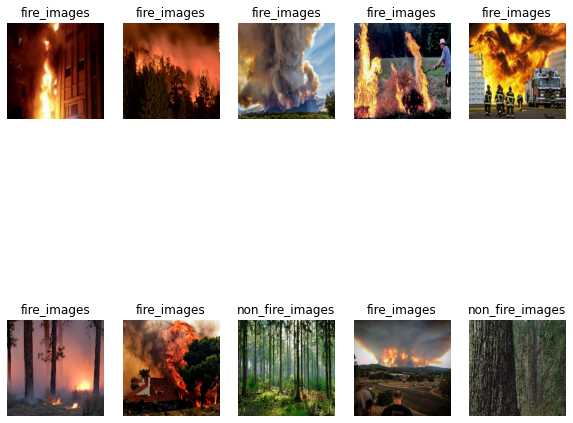

In [20]:
i = np.random.randint(10)
plt.figure(figsize=(10,10))
for imgBatch, labelBatch in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2, 5, i+1)
        plt.imshow(imgBatch[i].numpy().astype('uint8'))
        plt.title(labels[labelBatch[i]])
        plt.axis("off")
        cls()

In [7]:
scaling = tf.keras.Sequential([layers.experimental.preprocessing.Resizing(196, 196), layers.experimental.preprocessing.Rescaling(1./255.)])

In [8]:
model = Sequential([
    scaling,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=(32, 196, 196, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [9]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history = model.fit(train_data, batch_size=32, validation_data=val_data, verbose=1, epochs=5)

Epoch 1/5
25/25 [==============================] - 212s 8s/step - loss: 0.4339 - accuracy: 0.7387 - val_loss: 0.3614 - val_accuracy: 0.7538
Epoch 2/5
25/25 [==============================] - 198s 8s/step - loss: 0.2750 - accuracy: 0.8400 - val_loss: 0.2342 - val_accuracy: 0.9497
Epoch 3/5
25/25 [==============================] - 215s 8s/step - loss: 0.2404 - accuracy: 0.9450 - val_loss: 0.2356 - val_accuracy: 0.9648
Epoch 4/5
25/25 [==============================] - 204s 8s/step - loss: 0.2262 - accuracy: 0.9475 - val_loss: 0.2352 - val_accuracy: 0.9146
Epoch 5/5
25/25 [==============================] - 204s 8s/step - loss: 0.1240 - accuracy: 0.9525 - val_loss: 0.1293 - val_accuracy: 0.9698


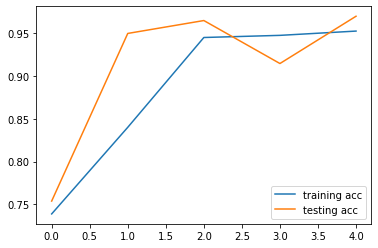

In [10]:
plt.plot(history.history['accuracy'] ,label='training acc')
plt.plot(history.history['val_accuracy'],label='testing acc')
plt.legend()

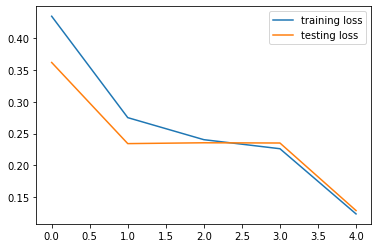

In [11]:
plt.plot(history.history['loss'] ,label='training loss')
plt.plot(history.history['val_loss'],label='testing loss')
plt.legend()

In [12]:
model.evaluate(val_data)

7/7 [==============================] - 15s 2s/step - loss: 0.1293 - accuracy: 0.9698


[0.12928438186645508, 0.9698492288589478]

In [13]:
model.save("model.h5")

In [14]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.2
    Uninstalling protobuf-3.20.2:
      Successfully uninstalled protobuf-3.20.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnx 1.13.0 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.


In [15]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model.h5 \
    my_tfjs_model

2023-02-14 13:54:04.675249: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-14 13:54:04.675421: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-14 13:54:04.675452: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [16]:
!ls /content/my_tfjs_model -lh

total 1.8M
-rw-r--r-- 1 root root 1.7M Feb 14 13:54 group1-shard1of1.bin
-rw-r--r-- 1 root root 9.1K Feb 14 13:54 model.json
